<h1>Question 24</h1>

In [8]:
%run Common.ipynb

import os.path
import pandas as pd

#!pip install surprise
from surprise import Dataset, Reader, accuracy
from surprise.model_selection import KFold
from surprise.prediction_algorithms.matrix_factorization import SVD
from surprise.model_selection.validation import cross_validate

np.set_printoptions(suppress=True,floatmode='maxprec_equal')

In [9]:
reader = Reader(line_format='user item rating timestamp', sep=',', skip_lines=1)
data = Dataset.load_from_file('ml-latest-small/ratings.csv', reader=reader)

k_list = np.linspace(2,50,25).astype(int)
k_list

array([ 2,  4,  6,  8, 10, 12, 14, 16, 18, 20, 22, 24, 26, 28, 30, 32, 34,
       36, 38, 40, 42, 44, 46, 48, 50])

In [10]:
cols = ['k','Avg RMSE', 'Avg MAE']

if os.path.isfile('q24_measures.pickle'):
    df_svd_measures = pickle_load('q24_measures.pickle')
    for k in log_progress(df_svd_measures.index):
        pass
else:
    df_svd_measures = pd.DataFrame(columns=cols)
    for k in log_progress(k_list):
        svd = SVD(n_factors=k)
        svd_cv = cross_validate(svd, data, cv=10, n_jobs=8)
        df_svd_measures = df_svd_measures.append({cols[0]:k,
                                          cols[1]:svd_cv['test_rmse'].mean(),
                                          cols[2]:svd_cv['test_mae'].mean()},
                                         ignore_index=True)
    df_svd_measures.set_index('k', inplace=True)
    pickle_write(df_svd_measures, 'q24_measures.pickle')

In [11]:
df_svd_measures[2:20]

Avg RMSE   Avg MAE
k                       
2.0   0.888076  0.683973
4.0   0.888067  0.683303
6.0   0.887511  0.683691
8.0   0.886479  0.682610
10.0  0.887007  0.683351
12.0  0.888173  0.683513
14.0  0.887685  0.683153
16.0  0.887852  0.683459
18.0  0.887962  0.683098
20.0  0.886925  0.682582

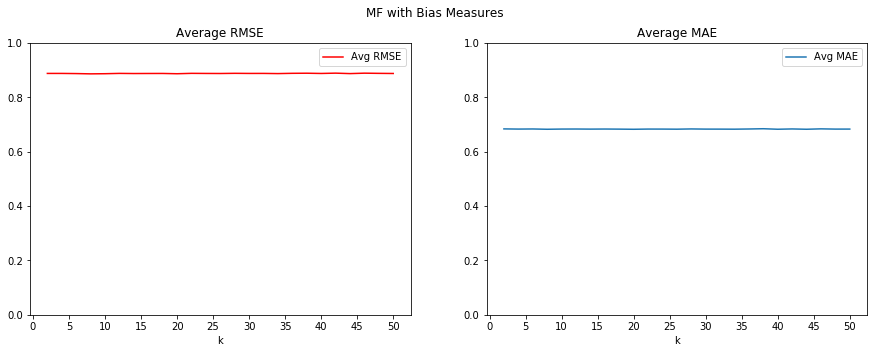

In [12]:
fig, axes = plt.subplots(nrows=1, ncols=2)
fig.set_figwidth(15)
fig.set_figheight(5)
fig.suptitle("MF with Bias Measures")
df_svd_measures[['Avg RMSE']].plot(ax=axes[0], title="Average RMSE", xticks=np.linspace(0,50,11), ylim=(0,1), color='red')
_ = df_svd_measures[['Avg MAE']].plot(ax=axes[1], title="Average MAE", ylim=(0,1), xticks=np.linspace(0,50,11))

<h1>Question 25</h1>

In [13]:
df_svd_measures.idxmin()

Avg RMSE     8.0
Avg MAE     20.0
dtype: float64

In [14]:
print('The  minimum average RMSE is: %4.6f'%df_svd_measures['Avg RMSE'].min())
print('The  minimum average MAE is: %4.6f'%df_svd_measures['Avg MAE'].min())

The  minimum average RMSE is: 0.886479
The  minimum average MAE is: 0.682582
